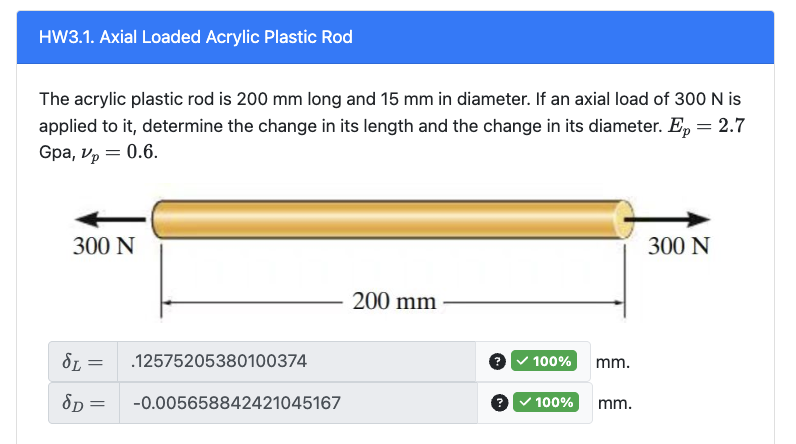

In [3]:
# 3.1
from math import *

l=200e-3
d=15e-3
Ep=2.7e9
vp=0.6
# ======================



f=300
A=pi/4*d**2

# 长度变化量etal
etal=f/A*l/Ep
print(etal*1e3)
# 轴向应变 el

el=etal/l
ed=-vp*el
etad=ed*d
print(etad*1e3)


0.12575205380100374
-0.005658842421045167


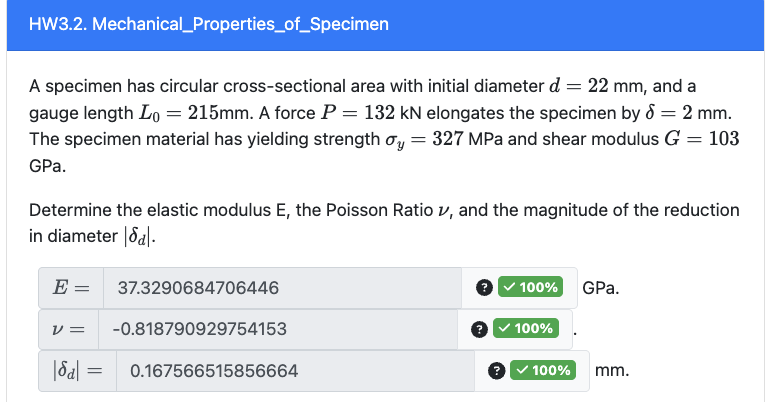

In [6]:
#HW03_2:
from sympy import *

L = 215
d = 22
P = 132
delt_l = 2
G = 103

L *=1e-3; d *=1e-3; G *=1e9; P *= 1e3; delt_l *=1e-3

A = pi*d**2/4
epsi_l = delt_l/L; sig = P/A

E = sig/epsi_l
print('E    :',E.evalf()/1e9,'Gpa')
Pv = E/(2*G)-1
print('Pv   :',Pv.evalf())
delt_d = (-epsi_l*Pv)*d
print('deltd:',delt_d.evalf()*1e3,'mm')

E    : 37.3290684706446 Gpa
Pv   : -0.818790929754153
deltd: 0.167566515856664 mm


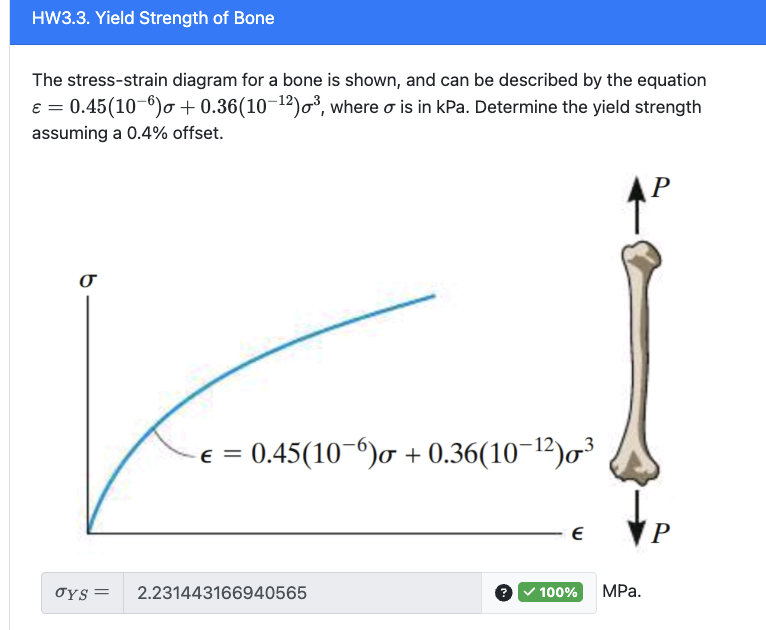

In [5]:
# 3.3
import numpy as np
import sympy as sym
off_set=0.4e-2
epsil,sigma = sym.S("epsil,sigma")
eq1 = 0.45*10**-6*sigma + 0.36*10**-12*sigma**3 - (off_set + 0.45*10**-6*sigma)

float(sym.solve(eq1,sigma)[0]*1e-3)



2.231443166940565

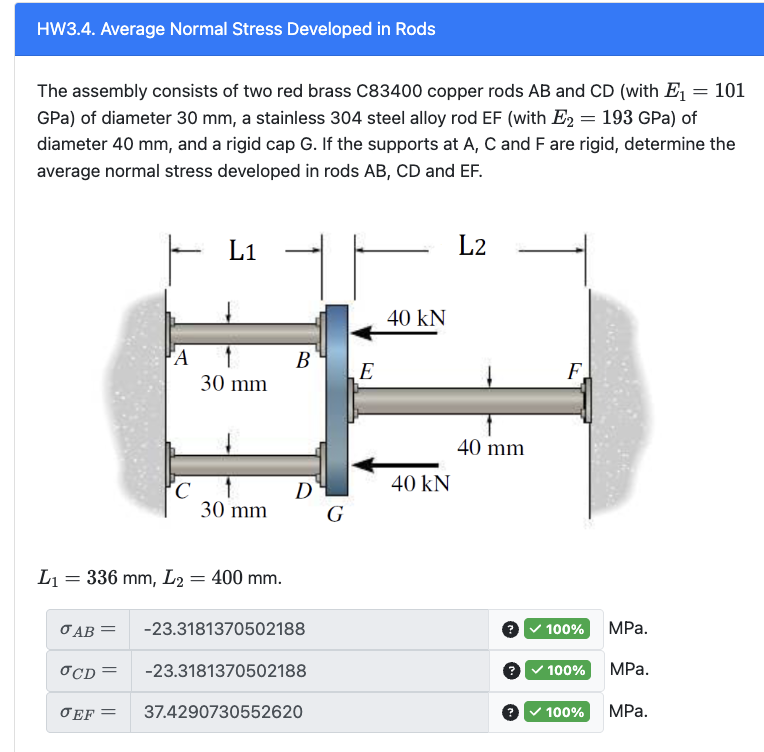

In [16]:
# 3.4
# 整体用到的是受力平衡
# 正负

E1=101
E2=193
d1=30
d2=40
l1=336
l2=400
F=40

E1=E1*1e9;E2=E2*1e9;F*=1e3;l1*=1e-3;l2*=1e-3;d1*=1e-3;d2*=1e-3


derta=S("derta")
A1=(d1/2)**2*pi
A2=(d2/2)**2*pi

p1=A1*derta/l1*E1
p2=A2*derta/l2*E2

q1=p1*2+p2-2*F
derta=solve(q1,derta)[0]
# print(derta)
p1=A1*derta/l1*E1
p2=A2*derta/l2*E2

sigma1=p1/A1
sigma2=p2/A2

print(-sigma1/1e6,-sigma1/1e6,sigma2/1e6)



-23.3181370502188 -23.3181370502188 37.4290730552620


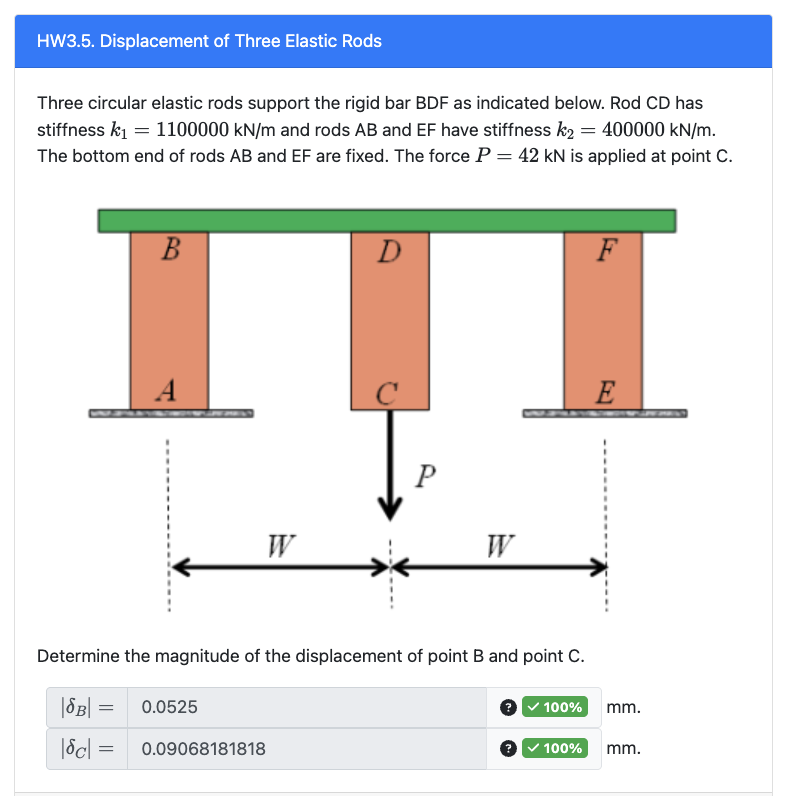

In [19]:
# 3.5
import numpy as np
import sympy as sym

P = 42
k1 = 11e5
k2 =4e5

dertac = P/k1
dertab = P/2/k2
print(dertab*1000,(dertab+dertac)*1000)

# b本身只动自己，然后c还要多动一个b

0.052500000000000005 0.09068181818181817


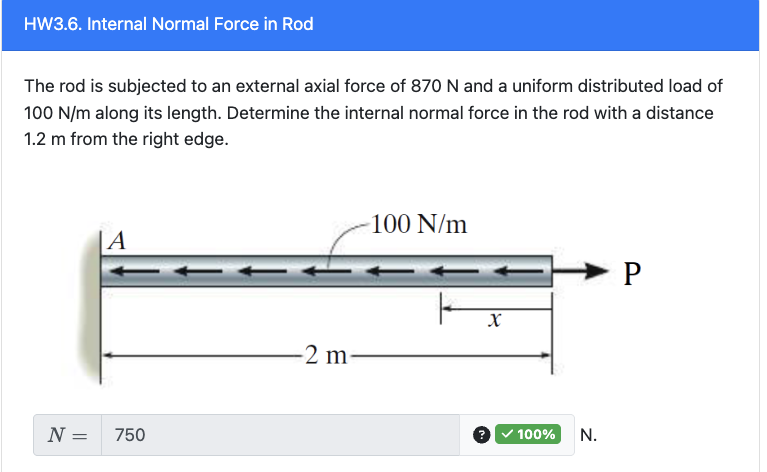

In [20]:
# 3.6:
import numpy as np
import sympy as sym

P = 870
L = 2
x = 1.2

Force = (P-100*x)
print(Force)


750.0


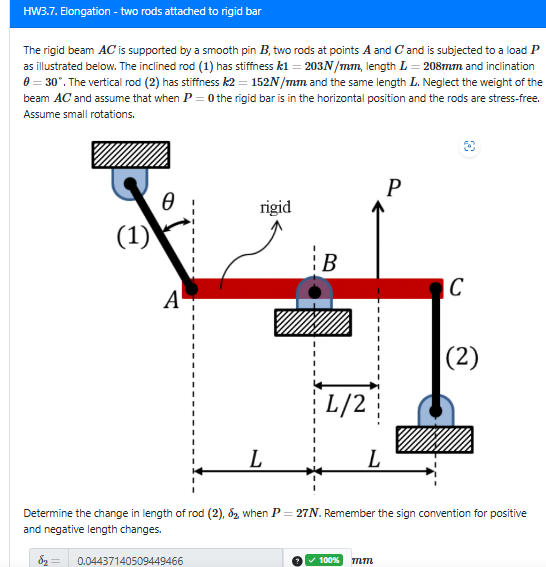

In [47]:
#3.7
k1 = 216e3 #N/m
L = 220e-3
theta = 30*pi/180 #rad
k2 = 161e3 #N/m
P = 30


t = symbols('t') #设角度
d1 = ((L*sin(theta))**2 + (L*cos(theta) + t*L)**2)**0.5 - L
d2 = t*L
F1 = k1*d1
F2 = k2*d2
eq1 = P*L/2 - F2*L - F1*cos(theta)*L 
print(solve(eq1)[1])
solve(eq1)[1]*L*1e3


0.000211085995365187


0.0464389189803411

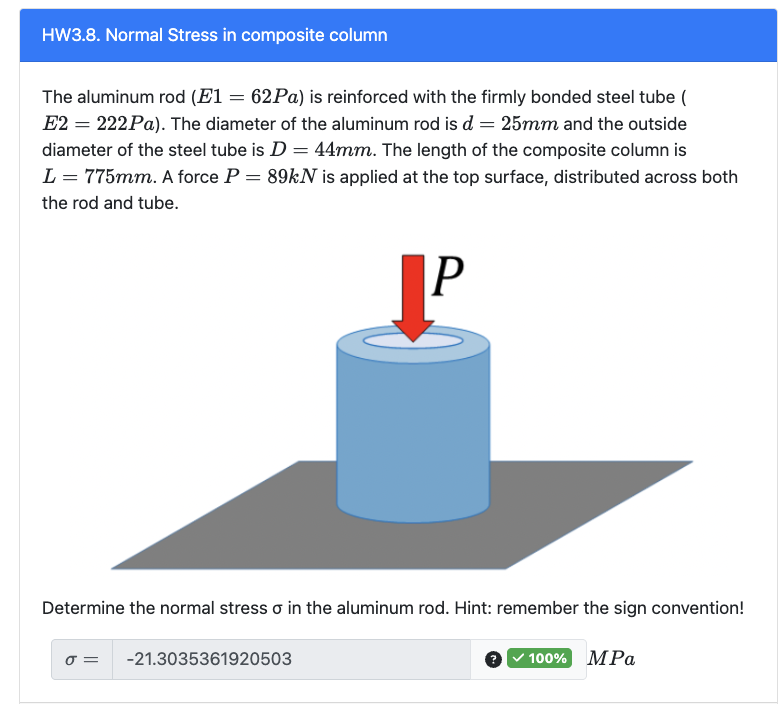

In [50]:
# 3.8
import numpy as np
import sympy as sym

E1 = 62e9
E2 = 222e9
din = 25*0.001
dout = 44*0.001
L = 775*0.001
P = 89*1000

derta = sym.S("fai")
force1 = (derta/L)*E1*(np.pi*din**2/4)

force2 = (derta/L)*E2*(np.pi*(dout**2-din**2)/4)
eq = force1+force2-P
answer = sym.solve(eq,derta)
# print(answer)
sigma = answer[0]/L*E1

print(-sigma/1e6)


-21.3035361920503


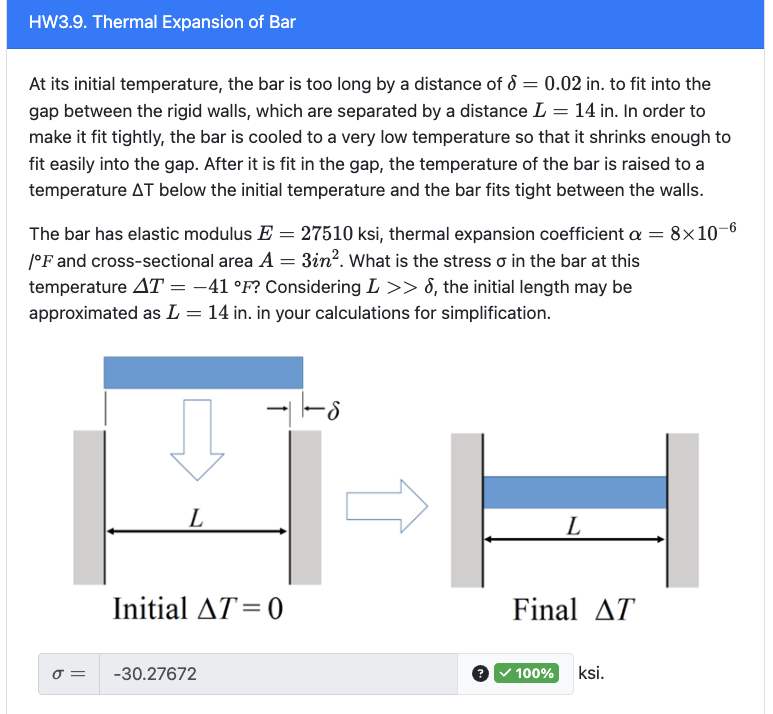

In [52]:
# 3.9
import numpy as np
import sympy as sym

derta = 0.02 # in
L = 14 # in
E = 27510
alpha = 8e-6
A = 3
t = -41

L_change = alpha*L*t

# print(L_change)
L_over = L_change+derta
# print(L_over)

sigma = L_over/L*E


print(-sigma)

# 因为这个时候实际要伸长，然后承受的应力应该向里，所以是负的


-30.27672


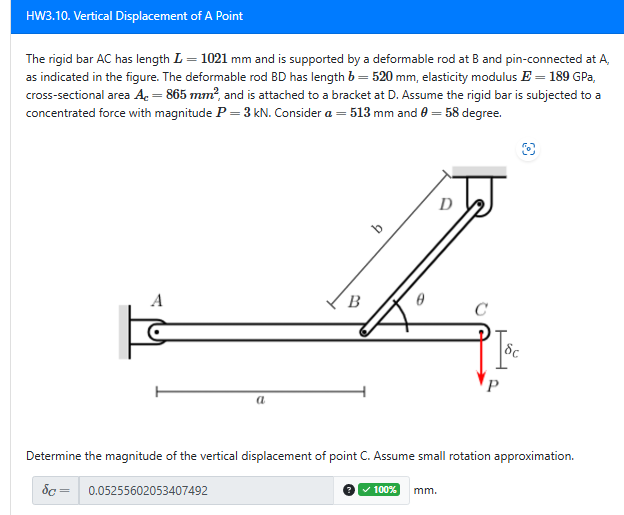

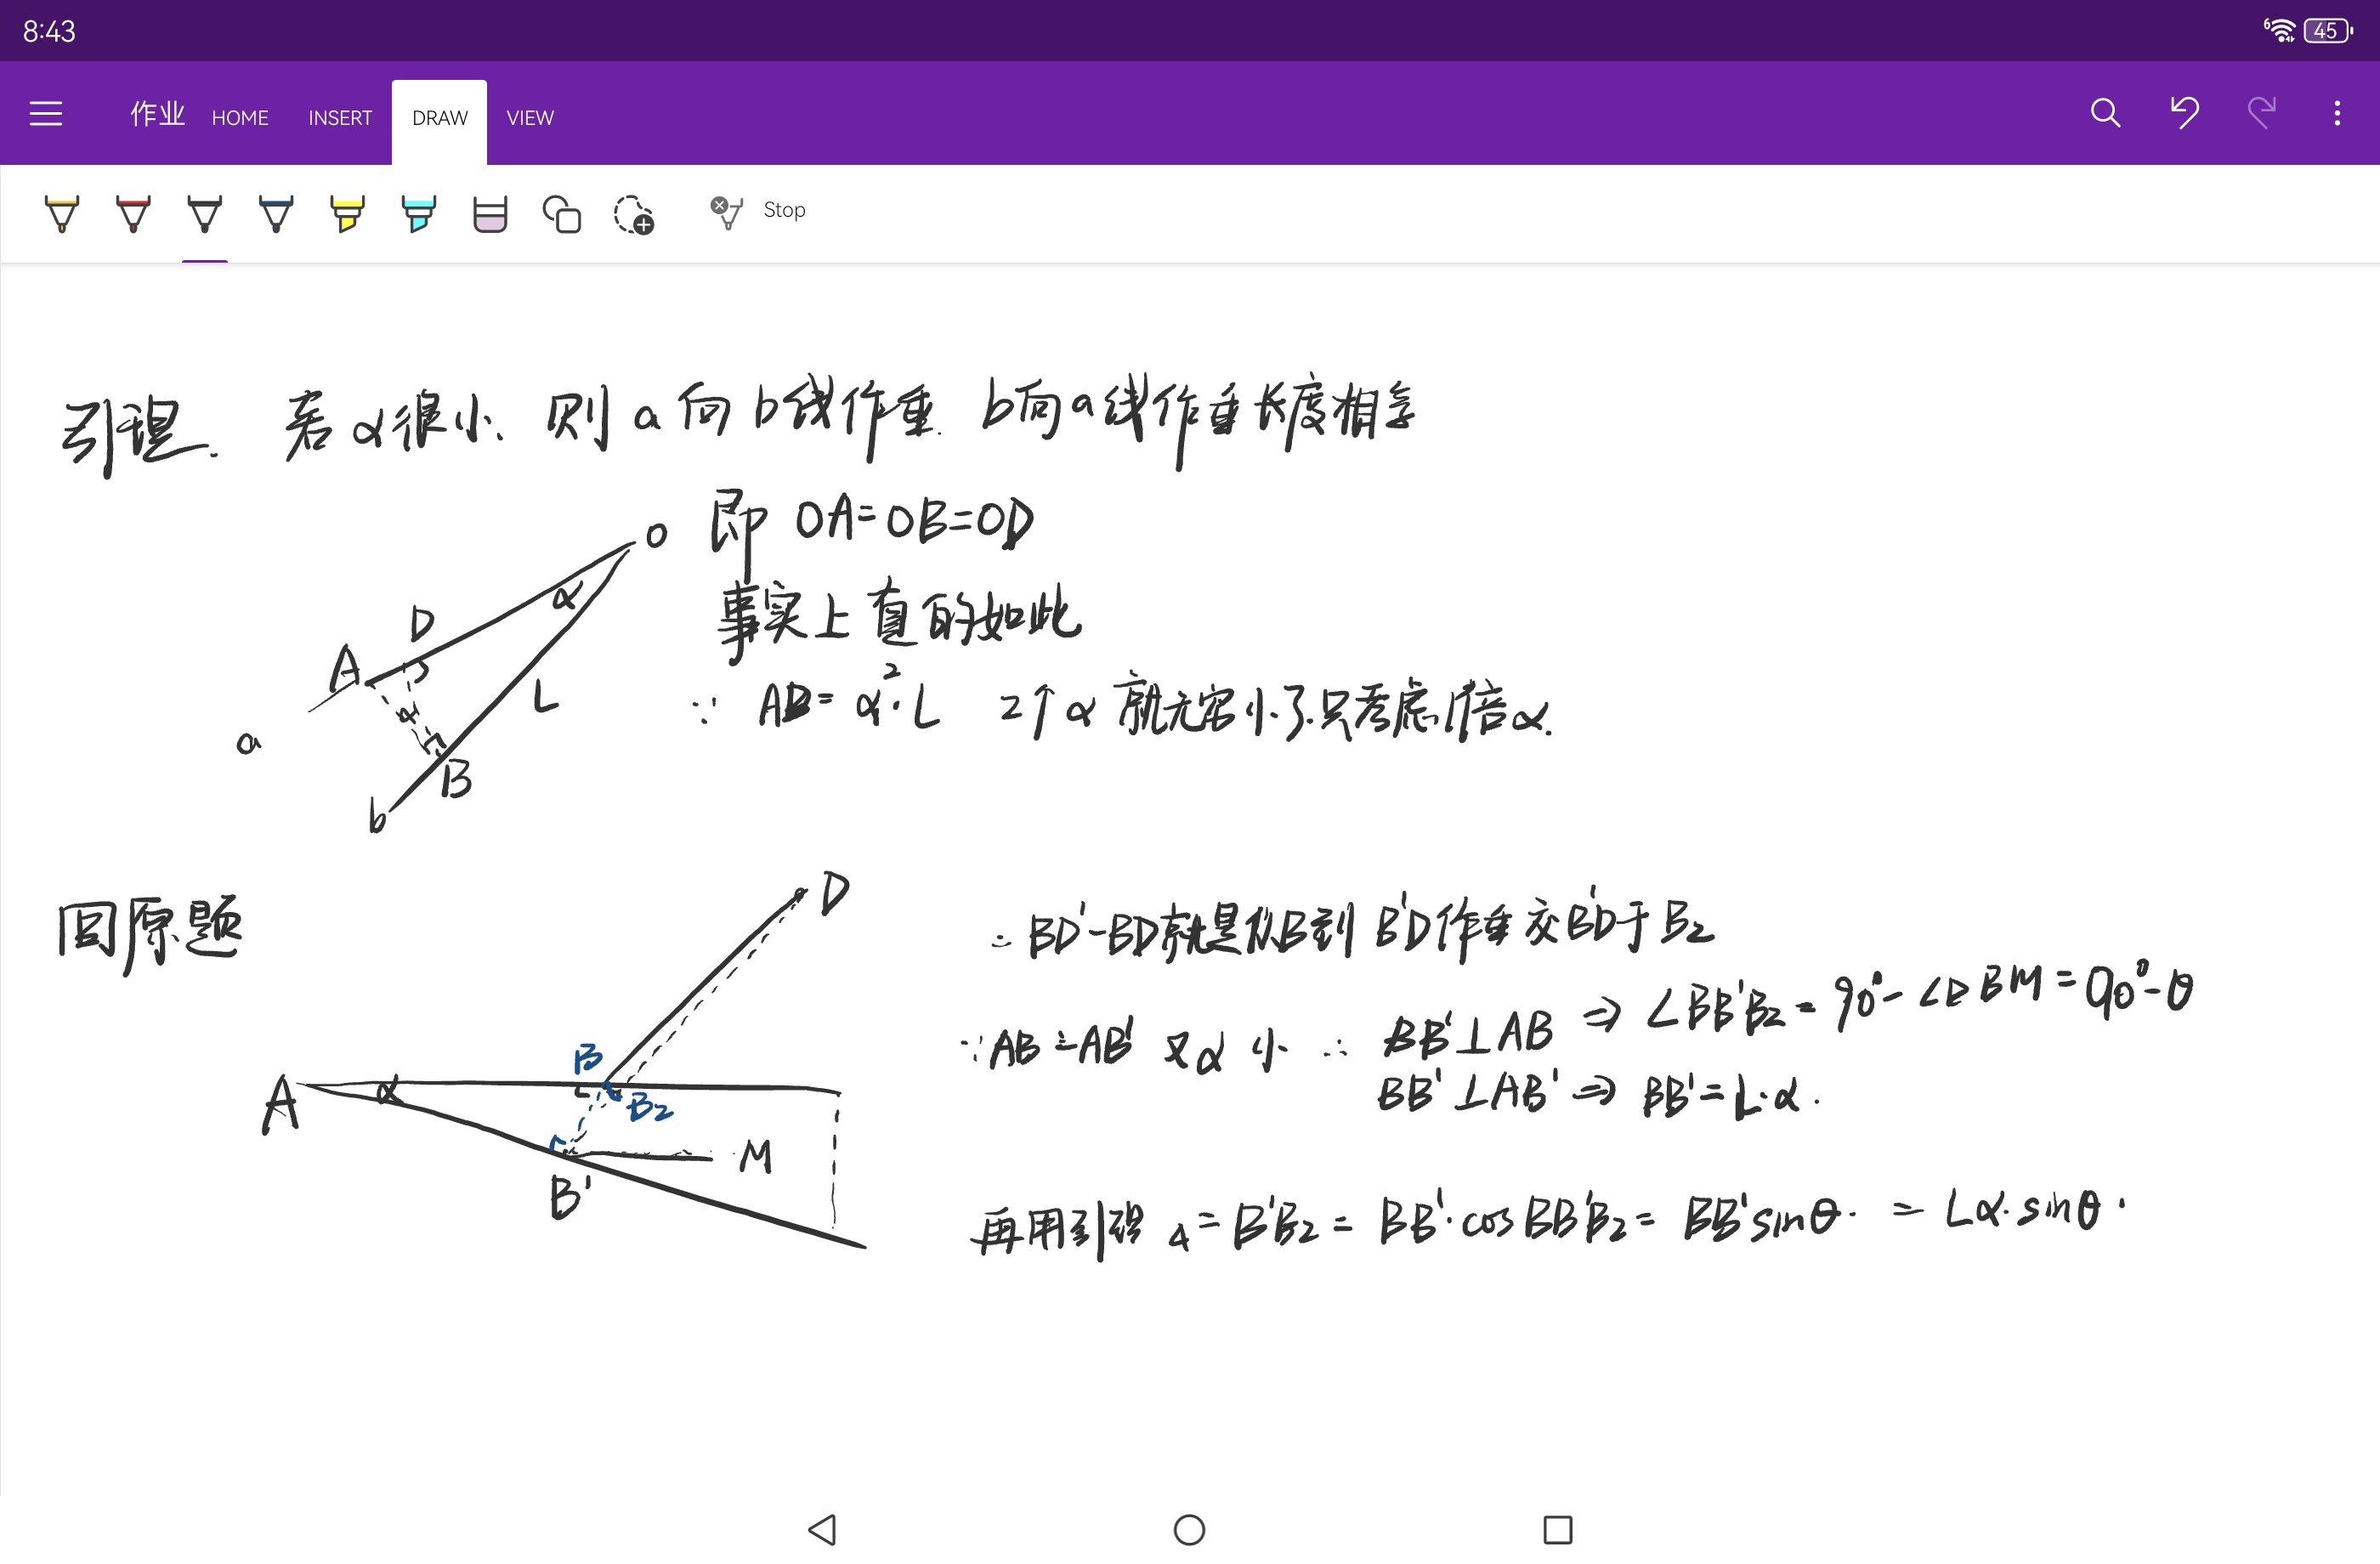

In [ ]:
# 3.10




L = 1021 # mm
b = 520 # mm
E = 189 # GPa
P = 3 # kN
a = 513 # mm
Ac = 865 # mm^2
theta = 58 # degrees

#单位转化
P=P*1e3
a=a*1e-3
b=b*1e-3
L=L*1e-3
E=E*1e9
Ac=Ac*1e-3*1e-3
theta=theta*pi/180

alpha=Symbol('alpha')

#拉伸模量 E= 正应力/正应变
#正应力 σ=力/面积

#计算杆的力（力矩平衡）
Fbd=P*L/a/sin(theta)

#弹性模数→弹性系数
k=E*Ac/b

#计算形变量←正应变
dL=Fbd/k #实际形变

#近似形变
dx=alpha*a*sin(theta)

alpha=solve([dx-dL],[alpha])[alpha]

float(L*alpha*1e3)


0.05255602053407502